<a href="https://colab.research.google.com/github/ashkanb77/House-Price-Estimation/blob/main/HousesPrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import cv2
import glob
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [12]:
data = pd.read_csv(
    'drive/MyDrive/datasets/HouseDataset/HousesInfo.txt',
    header=None, sep=' ', names=['bedrooms', 'bathrooms', 'area', 'zipcode', 'price']
)

In [13]:
data.head()

,bedrooms,bathrooms,area,zipcode,price
0,4,4.0,4053,85255,869500
1,4,3.0,3343,36372,865200
2,3,4.0,3923,85266,889000
3,5,5.0,4022,85262,910000
4,3,4.0,4116,85266,971226


In [17]:
from numpy.core.arrayprint import dtype_is_implied
images = []
for i in data.index.values:
  basepath = os.path.sep.join(['drive/MyDrive/datasets/HouseDataset/images/', f"{i+1}_*"])
  imgpaths = sorted(glob.glob(basepath))
  inputImages = []
  for path in imgpaths:
    inputImages.append(
        cv2.resize(cv2.imread(path), (64, 64))
    )
  outputImage = np.zeros((128, 128, 3), dtype='uint8')
  outputImage[:64, :64] = inputImages[0]
  outputImage[:64, 64:] = inputImages[1]
  outputImage[64:, :64] = inputImages[2]
  outputImage[64:, 64:] = inputImages[3]
  images.append(outputImage)

In [18]:
images = np.array(images)

In [19]:
images.shape

(535, 128, 128, 3)

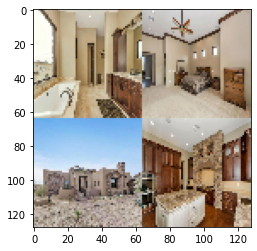

In [21]:
plt.imshow(images[7][...,::-1])